<a href="https://colab.research.google.com/github/HAppy149391/Titanic_Disaster/blob/master/Titanic_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

### Loading DataSet's By using pandas read_csv() function

In [10]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [11]:
train_length = len(titanic_train)
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


#### Train Data Set has 891 Rows and 12 Columns.
#### Test Data Set has 418 Rows and 11 Columns.

Bussiness Problem is We do predict testing data Survival Value of Testing Data based on features.

* For better prediction first we should understand data and find answers to our questions based on hidden insights of our data

In [12]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Features Descirption
* PassengerId - This feature is Unique for each Passenger in Titanic
* PClass - A proxy for socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower 
* Name - Name of a Passenger
* Sex - Gender of a Passenger,
* Age - Age of a Passenger(In Years)
* SibSp - The dataset defines family relations in this way.
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch - The dataset defines family relations in this way.
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket - Ticket Number [Unique for each passenger]
* Fare - Fare of each Ticket.
* Cabin - Cabin Number
* Embarkation - Port of Embarkation
  *	C = Cherbourg
  * Q = Queenstown
  * S = Southampton

* Unique Features: [PassengerId, Name, Ticket]
* Numerical Features: [Age,Fare]
* Categorical Features: [Pclass, Sex, SibSp, Parch, Cabin, Embarked]

Note: Unique Features might not be useful much, so we can drop those features. But by using some feature engineering we can find insights in data.

In [14]:
non_survived_count, survived_count = titanic_train.Survived.value_counts()

In [15]:
print(f"Non Survived People Percentage : {round((non_survived_count/train_length)*100,2)} %")
print(f"Survived People Percentage : {round((survived_count/train_length)*100,2)} %")

Non Survived People Percentage : 61.62 %
Survived People Percentage : 38.38 %


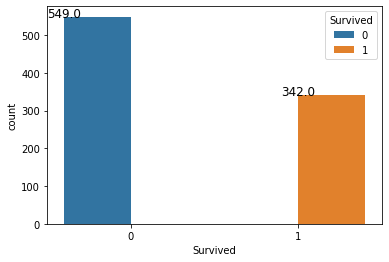

In [16]:
ax = sns.countplot(x=titanic_train.Survived, data = titanic_train, hue='Survived')
for p in ax.patches:
  x = p.get_x() + p.get_width() / 2 - 0.30
  y = p.get_y() + p.get_height()
  ax.annotate(y, (x, y), size = 12)
plt.show()

### Titanic Disaster Training Data 
* Most passengers(61%) didn't survived.
* Only 39% of passengers survided.

In [17]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Values

In [19]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
#Finding Missing Values in given features
missing_cols = []
missing_percent = []
for col in titanic_train.columns:
  missing_cols.append(col)
  missing_percent.append(round(titanic_train[col].isnull().sum()/(train_length),2) * 100)

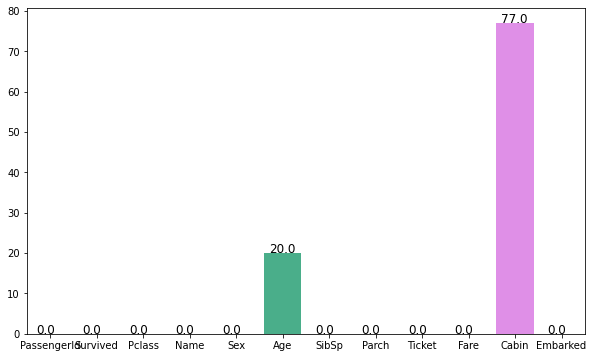

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = missing_cols, y = missing_percent)
for p in ax.patches:
  x = p.get_x() + p.get_width() / 2 - 0.30
  y = p.get_y() + p.get_height()
  ax.annotate(y, (x, y), size = 12)
plt.show();

### Missing Values in Training Data
* In Training Data set three features has missing values
* Embarked has 2 missing values. It is categorical data, so we can replace missing values with mostly occured(Mode) value in training data set.
* Age is numerical feature and 20% of values are missing in training data set. We have several ways of handle missing values. Eg: Replacing missing values by Mean value, Median value, Some other techniques. Mostly if data is normally distributed mean value is prefarable otherwise median value is preferable.
* Cabin has 77% of missing values. This percentage is very high, mostly we can drop features has high percentage of missing values.

## Numerical Features Analysis
 * Training Data has two numerical features Age and Fare.


## Age

In [22]:
titanic_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

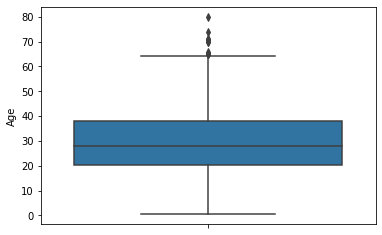

In [23]:
sns.boxplot(y=titanic_train.Age)
plt.show()

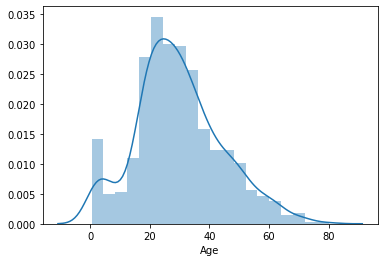

In [24]:
# AGE
sns.distplot(titanic_train.Age)
plt.show()

In [25]:
titanic_train.Age.corr(titanic_train.Survived, method='spearman')

-0.05256530004469449

#### Observations
* Age is looks like little right skewed distribution, This type of distribution mostly we prefer median value compared to mean to handle missing values.
* According to Box plot we have very little outliers.
* Age value doesn't much corralation with Survived feature.

## Fare

In [26]:
titanic_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

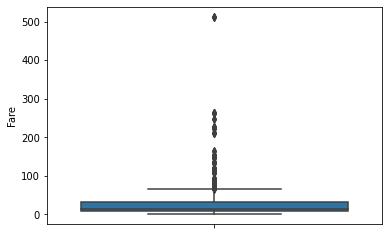

In [27]:
sns.boxplot(y=titanic_train.Fare)
plt.show()

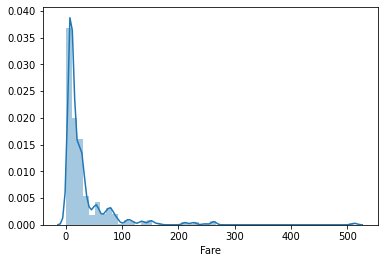

In [28]:
sns.distplot(titanic_train.Fare)
plt.show()

In [29]:
for i in range(0,100,10):
  val = titanic_train.Fare.values
  val = np.sort(val, axis=None)
  print(f"{i} Percentile Value is : {val[int(train_length*(i / 100))]}")
print("100 Percentile Value is : ", val[-1])

0 Percentile Value is : 0.0
10 Percentile Value is : 7.55
20 Percentile Value is : 7.8542
30 Percentile Value is : 8.05
40 Percentile Value is : 10.5
50 Percentile Value is : 14.4542
60 Percentile Value is : 21.6792
70 Percentile Value is : 27.0
80 Percentile Value is : 39.6875
90 Percentile Value is : 77.9583
100 Percentile Value is :  512.3292


In [30]:
for i in range(90,100,1):
  val = titanic_train.Fare.values
  val = np.sort(val, axis=None)
  print(f"{i} Percentile Value is : {val[int(train_length*(i / 100))]}")
print("100 Percentile Value is : ", val[-1])

90 Percentile Value is : 77.9583
91 Percentile Value is : 79.2
92 Percentile Value is : 82.1708
93 Percentile Value is : 89.1042
94 Percentile Value is : 93.5
95 Percentile Value is : 113.275
96 Percentile Value is : 134.5
97 Percentile Value is : 151.55
98 Percentile Value is : 211.3375
99 Percentile Value is : 262.375
100 Percentile Value is :  512.3292


In [31]:
for i in np.arange(0.0, 1.0, 0.1):
  val = titanic_train.Fare.values
  val = np.sort(val, axis=None)
  print(f"{round(99+i,3)} Percentile Value is : {val[int(train_length*(float(99+i)/100))]}")
print("100 Percentile Value is : ", val[-1])

99.0 Percentile Value is : 262.375
99.1 Percentile Value is : 262.375
99.2 Percentile Value is : 262.375
99.3 Percentile Value is : 263.0
99.4 Percentile Value is : 263.0
99.5 Percentile Value is : 263.0
99.6 Percentile Value is : 263.0
99.7 Percentile Value is : 512.3292
99.8 Percentile Value is : 512.3292
99.9 Percentile Value is : 512.3292
100 Percentile Value is :  512.3292


In [32]:
titanic_train.Fare.corr(titanic_train.Survived, method='spearman')

0.32373613944480834

#### Observations
* Fare feature has outlier value 512. By using percentile we can put threshhold value 300, so we can remove which row has fare value morethen 300.
* Data is not distributed normlly.
* We don't have strong correlation between Fare and Survived features. corralation is = 0.32.

### Categorical Features
* Train Data has [Pclass, Sex, SibSp, Parch, Cabin, Embarked] categorical features.

In [33]:
categorical_columns = ['Sex', 'SibSp', 'Parch', 'Embarked','Pclass']

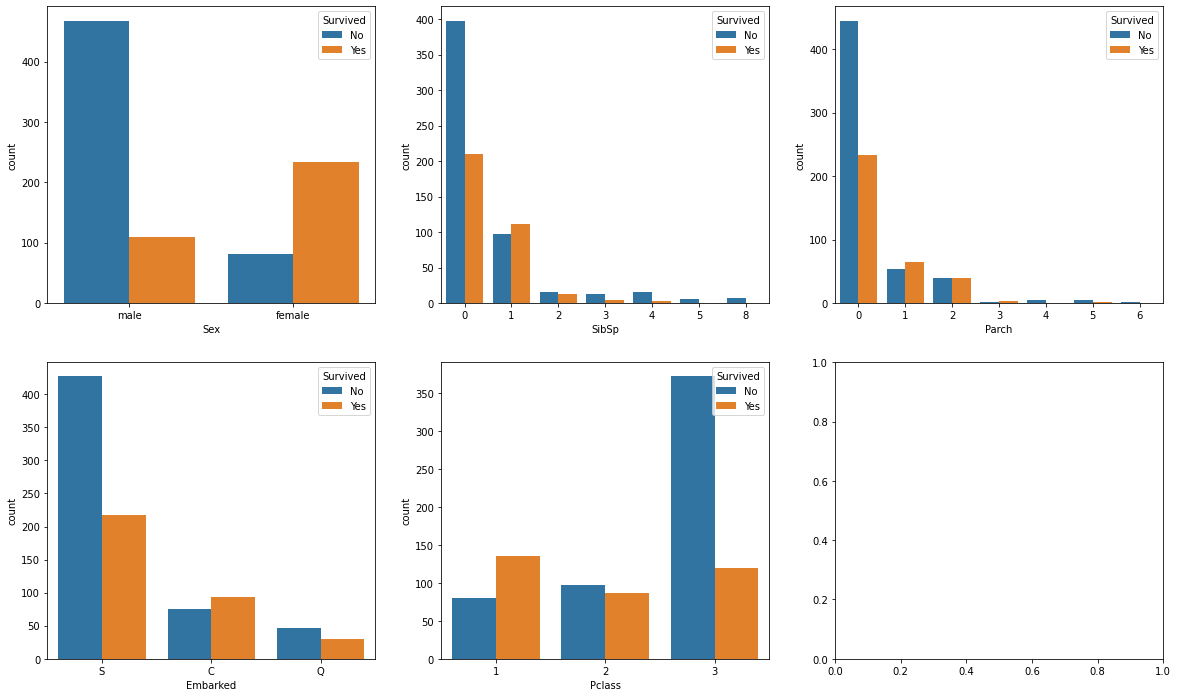

In [34]:
fig, ax = plt.subplots(math.ceil(len(categorical_columns) / 3), 3, figsize=(20, 12))
ax = ax.flatten()
for ax, col in zip(ax, categorical_columns):
  sns.countplot(x= col, data= titanic_train, hue='Survived', ax=ax)
  ax.legend(title='Survived', labels=['No', 'Yes'],loc='upper right')

#### Categorical Feature Observations
* Training data has most of passengers are male and less percent of passengers were survied in titanic disaster, so Female passengers has high chance of survived chance.
* Passenger Class First Class Passengers have high survival ratio compared to Second Class and Third Class Passengers. Most of passengers are traveling on Third class but they have very low survival rate compared to First and Second Class passengers.
* Family size of a passenger[SibSp and ParCh] also has impcat on survival, family size 0 passengers has very low survival ratio.
* Embarked S has very low srvival ratio.


In [35]:
titanic_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [36]:
#titanic_train.drop(titanic_train[titanic_train['Fare']>300].index, inplace=True)

## Feature Engineering 
* Default Features are not much suffecient to decide is passenger survived or not. So we do create some features which are used for predicting is passenger is survived or not.

In [37]:
titanic_train.Age.fillna(titanic_train.Age.median(), inplace=True)

In [38]:
titanic_train.Age.isnull().sum()

0

In [39]:
titanic_train.Parch.corr(titanic_train.Survived)

0.08162940708348372

In [40]:
titanic_train.SibSp.corr(titanic_train.Survived)

-0.035322498885735645

In [41]:
titanic_train['family_size'] = titanic_train.Parch + titanic_train.SibSp

In [42]:
titanic_train.family_size.corr(titanic_train.Survived)

0.016638989282745254

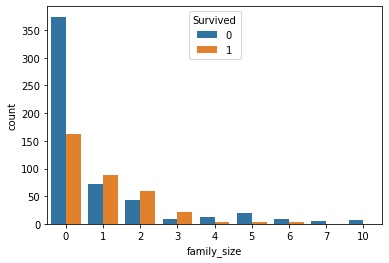

In [43]:
sns.countplot(x='family_size', data=titanic_train, hue='Survived')
plt.show()

#### Observations
* Passengers which have 0 family size has very less survived ratio, so we can build one feature for is alone or not.

In [44]:
titanic_train.family_size.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: family_size, dtype: float64

In [45]:
titanic_train['is_alone'] = titanic_train.family_size.map(lambda a: 1 if a == 0 else 0)

In [46]:
titanic_train.is_alone.corr(titanic_train.Survived, method='spearman')

-0.20336708569989195

In [47]:
titanic_train.Age.corr(titanic_train.Survived, method='spearman')

-0.03700449741729798

In [48]:
bins = [0, 5, 20, 40, 60, 90]
titanic_train['age_bins'] = pd.cut(x=titanic_train.Age, bins= bins, labels=['0-5','5-20','20-40','40-60','60+'] )
titanic_train = pd.get_dummies(data=titanic_train, columns = ['age_bins'], prefix='age')

In [49]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone,age_0-5,age_5-20,age_20-40,age_40-60,age_60+
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,1,0,0


In [50]:
titanic_train.Fare.corr(titanic_train.Survived, method='spearman')

0.32373613944480834

In [51]:
titanic_train = pd.get_dummies(data=titanic_train, columns=['Embarked'], prefix='embarked')

In [52]:
titanic_train = pd.get_dummies(data=titanic_train, columns=['Sex'])

In [53]:
std_fare = StandardScaler()
std_fare.fit(titanic_train.Fare.values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
titanic_train['std_fare'] = std_fare.transform(titanic_train.Fare.values.reshape(-1,1))

In [55]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'family_size', 'is_alone', 'age_0-5',
       'age_5-20', 'age_20-40', 'age_40-60', 'age_60+', 'embarked_C',
       'embarked_Q', 'embarked_S', 'Sex_female', 'Sex_male', 'std_fare'],
      dtype='object')

In [56]:
titanic_train.drop(labels=['PassengerId','Name','Ticket','Cabin','Fare'], axis=1, inplace=True)

In [57]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,family_size,is_alone,age_0-5,age_5-20,age_20-40,age_40-60,age_60+,embarked_C,embarked_Q,embarked_S,Sex_female,Sex_male,std_fare
0,0,3,22.0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,-0.502445
1,1,1,38.0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0.786845
2,1,3,26.0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,-0.488854
3,1,1,35.0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0.420730
4,0,3,35.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,-0.486337


In [58]:
titanic_train.corr()

,Survived,Pclass,Age,SibSp,Parch,family_size,is_alone,age_0-5,age_5-20,age_20-40,age_40-60,age_60+,embarked_C,embarked_Q,embarked_S,Sex_female,Sex_male,std_fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.016639,-0.203367,0.150304,-0.005266,-0.051250,0.005716,-0.051224,0.168240,0.003650,-0.155660,0.543351,-0.543351,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,0.065997,0.135207,0.070793,0.132360,0.098922,-0.254680,-0.136667,-0.243292,0.221009,0.081720,-0.131900,0.131900,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,-0.245619,0.171647,-0.470432,-0.435240,-0.047309,0.602286,0.448281,0.030248,-0.031415,-0.014665,-0.081163,0.081163,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.890712,-0.584471,0.244344,0.114725,-0.130679,-0.063714,-0.055819,-0.059528,-0.026354,0.070941,0.114631,-0.114631,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.783111,-0.583398,0.277839,0.095137,-0.191842,0.004592,-0.021502,-0.011069,-0.081228,0.063036,0.245489,-0.245489,0.216225
family_size,0.016639,0.065997,-0.245619,0.890712,0.783111,1.000000,-0.690922,0.305804,0.125939,-0.185156,-0.041253,-0.048892,-0.046215,-0.058592,0.079977,0.200988,-0.200988,0.217138
is_alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.690922,1.000000,-0.270132,-0.104675,0.205718,-0.040182,0.070067,-0.095298,0.086464,0.024929,-0.303646,0.303646,-0.271832
age_0-5,0.150304,0.070793,-0.470432,0.244344,0.277839,0.305804,-0.270132,1.000000,-0.096314,-0.297889,-0.093353,-0.036265,-0.003924,-0.033229,0.025430,0.059571,-0.059571,-0.003103
age_5-20,-0.005266,0.132360,-0.435240,0.114725,0.095137,0.125939,-0.104675,-0.096314,1.000000,-0.552301,-0.173081,-0.067237,-0.011640,-0.040847,0.037931,0.055199,-0.055199,-0.024649
age_20-40,-0.051250,0.098922,-0.047309,-0.130679,-0.191842,-0.185156,0.205718,-0.297889,-0.552301,1.000000,-0.535319,-0.207956,-0.005745,0.111173,-0.063406,-0.044086,0.044086,-0.050536


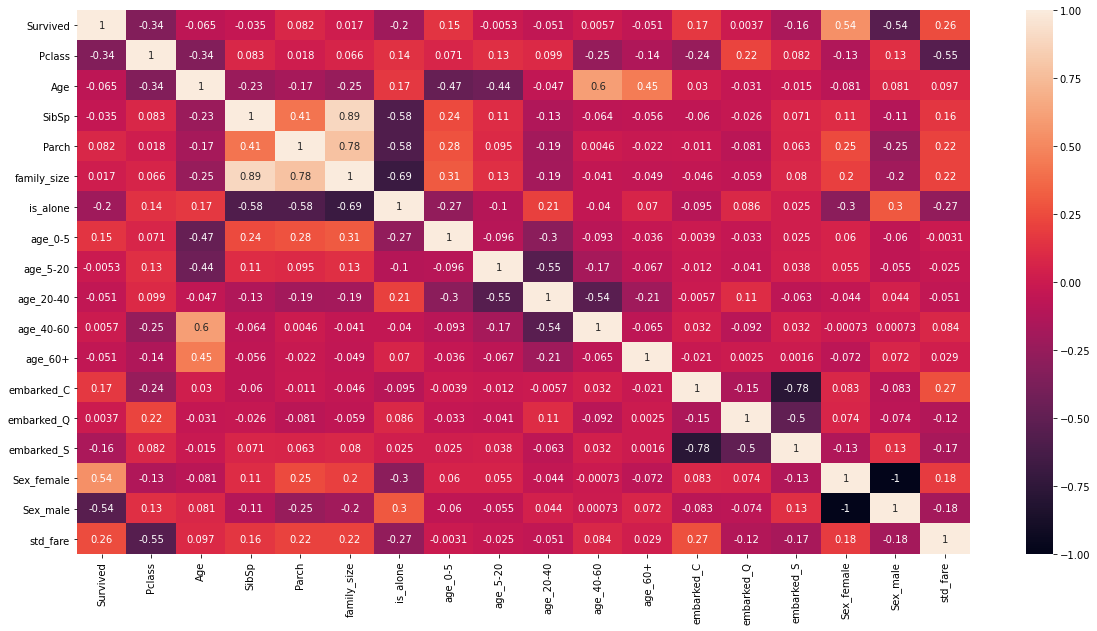

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(titanic_train.corr(), annot=True)
plt.show()

In [60]:
y = titanic_train.Survived
X = titanic_train.drop(labels=['Survived'], axis=1)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [71]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
train_predictions = lreg.predict(X_train)
train_fpr, train_tpr, threshold = roc_curve(y_train, train_predictions)
train_score = auc(train_fpr, train_tpr)
test_predictions = lreg.predict(X_test)
test_fpr, test_tpr, threshold = roc_curve(y_test, test_predictions)
test_score = auc(test_fpr, test_tpr)

print(train_score)
print(test_score)

0.8049319617864613
0.767078488372093


In [77]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid = GridSearchCV(estimator=lreg, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1, return_train_score=True, scoring='roc_auc')

In [78]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [79]:
grid.best_score_

0.8642200358037953

In [85]:
grid.cv_results_

{'mean_fit_time': array([0.01724925, 0.02582455, 0.04694347, 0.04851322, 0.0495007 ,
        0.04784551, 0.04470539]),
 'mean_score_time': array([0.00360708, 0.00322862, 0.00366902, 0.00333681, 0.00331421,
        0.00337868, 0.00309763]),
 'mean_test_score': array([0.76187884, 0.85890145, 0.86370692, 0.86201687, 0.86334422,
        0.86422004, 0.86319255]),
 'mean_train_score': array([0.77706059, 0.86073622, 0.86921779, 0.87303258, 0.87436214,
        0.87489724, 0.87496455]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'rank_test_score': array([7, 6, 2, 5, 3, 1, 4], dtype=int32),
 'split0_test_score': array([0.73254565, 0.86305048, 0.85338346, 0.85338346, 0.86251343,
        0.86278195, 0.8622449 ]),
 'split0_train_score': array([0

In [83]:
estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

In [84]:
estimator.fit(X_train, y_train)
train_predictions = estimator.predict(X_train)
train_fpr, train_tpr, threshold = roc_curve(y_train, train_predictions)
train_score = auc(train_fpr, train_tpr)
test_predictions = estimator.predict(X_test)
test_fpr, test_tpr, threshold = roc_curve(y_test, test_predictions)
test_score = auc(test_fpr, test_tpr)
print(train_score)
print(test_score)

0.8049319617864613
0.767078488372093
